In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape


(10000, 28, 28)

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2970 - acc: 0.8921
Epoch 2/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.2817 - acc: 0.8952
Epoch 3/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2706 - acc: 0.8999
Epoch 4/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2599 - acc: 0.9037
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2496 - acc: 0.9059
Epoch 6/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2398 - acc: 0.9100
Epoch 7/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2321 - acc: 0.9125
Epoch 8/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2276 - acc: 0.9143
Epoch 9/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2175 - acc: 0.9176
Epoch 10/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2120 - acc: 0.9206

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/step
Test accuracy: 0.8831


In [13]:
prediction = model.predict(train_images)

In [14]:
np.argmax(prediction[0])

9

In [15]:
test_labels[0]

9

In [16]:
for i in range(len(prediction)):
    prediction[i] = np.argmax(prediction[i])

9


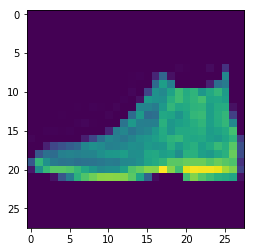

In [19]:
plt.figure()
plt.imshow(test_images[0])
print(test_labels[0])